In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Calculate the date 1 year ago from the last data point in the database
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
lastyear_date = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)

In [11]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > lastyear_date).\
        order_by(Measurement.date).all()
    
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df=pd.DataFrame(precipitation, columns=['Date','Precipitation'])
precipitation_df.set_index('Date', inplace=True)
precipitation_df.head()



,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


Text(0.5, 0, 'Date')

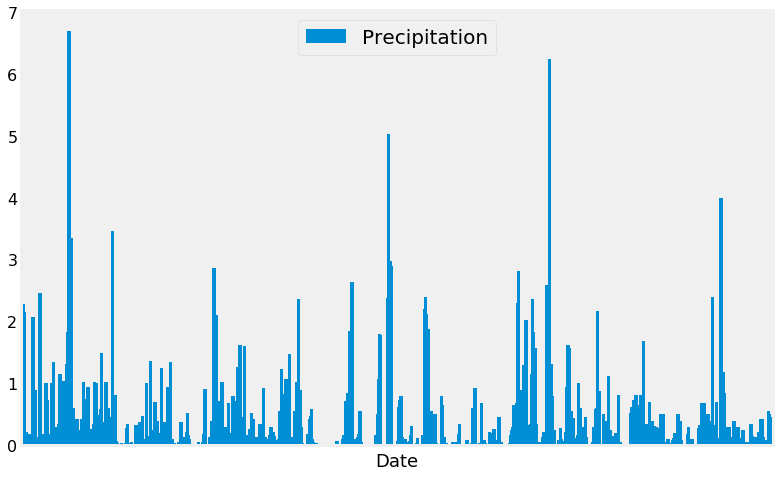

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = precipitation_df.plot(kind='bar',width=10,figsize=(12,8))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis='y', labelsize=16)
plt.grid()
plt.legend(loc="upper center",fontsize=20)
plt.xlabel("Date", size=18)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [16]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [17]:
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [19]:
most_active_station = station_count[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [21]:
temp_highest = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == most_active_station).\
                filter(Measurement.date >= lastyear_date).all()
temp_highest_df = pd.DataFrame(temp_highest)
temp_highest_df.set_index('station', inplace=True)

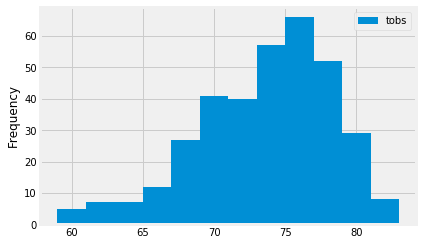

In [22]:
temp_highest_df.plot(kind='hist',bins=12)

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
trip=calc_temps('2017-04-27','2017-05-03')
trip

[(58.0, 72.06976744186046, 79.0)]

In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [27]:
trip_df=pd.DataFrame(trip, columns=['TMin','TAvg','TMax'])
trip_df

,TMin,TAvg,TMax
0,58.0,72.069767,79.0


Text(0.5, 1.0, 'Trip Avg Temp')

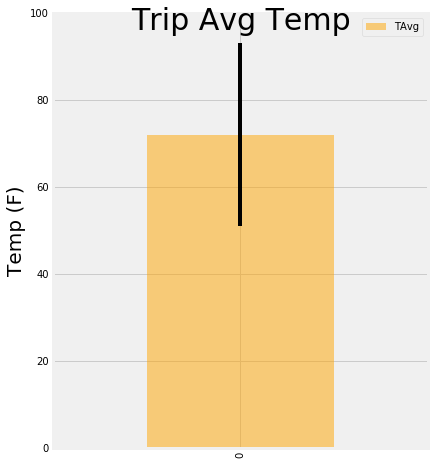

In [28]:
trip_df=pd.DataFrame(trip, columns=['TMin','TAvg','TMax'])
trip_df_yerr=trip_df.loc[0,'TMax']-trip_df.loc[0,'TMin']
trip_df['TAvg'].plot(kind='bar',yerr=trip_df_yerr, figsize=(6,8),color='orange',alpha=0.5)
plt.legend()
plt.ylim(0, 100)
plt.ylabel('Temp (F)',fontsize=20)
plt.title('Trip Avg Temp',horizontalalignment='center', verticalalignment='top',fontsize=30)

In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [30]:
start_date='2017-04-27'
end_date='2017-05-03'
session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation,func.sum(Measurement.prcp)).\
                filter(Measurement.station == Station.station).\
                filter(Measurement.date >= start_date).\
                filter(Measurement.date <= end_date).\
                group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

[('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  7.630000000000001),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 4.37),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  2.5099999999999993),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  2.2799999999999994),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  1.9500000000000002),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.27),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

In [31]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
normals=[]
date=[]
daily=[]
start_date='2017-04-27'
end_date='2017-05-02'

start = dt.datetime.strptime(start_date, '%Y-%m-%d')
end = dt.datetime.strptime(end_date, '%Y-%m-%d')
step = dt.timedelta(days=1)
while start <= end:
    date.append(start.strftime('%Y-%m-%d'))
    start += step

for day in date:
    daily.append(day.split('-')[1]+'-'+day.split('-')[2])

for day in daily:
    normals.append(*daily_normals(day))


In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df=pd.DataFrame(normals, columns=['Tmix', 'Tmax','Tavg'])
normals_df['Date']=date
normals_df.set_index('Date')


,Tmix,Tmax,Tavg
Date,,,
2017-04-27,65.0,72.872727,81.0
2017-04-28,63.0,73.464286,79.0
2017-04-29,66.0,73.303571,81.0
2017-04-30,58.0,71.557692,78.0
2017-05-01,65.0,72.759259,79.0
2017-05-02,65.0,73.050847,79.0


In [35]:
normals_df['Date']

0    2017-04-27
1    2017-04-28
2    2017-04-29
3    2017-04-30
4    2017-05-01
5    2017-05-02
Name: Date, dtype: object

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text xticklabel objects>)

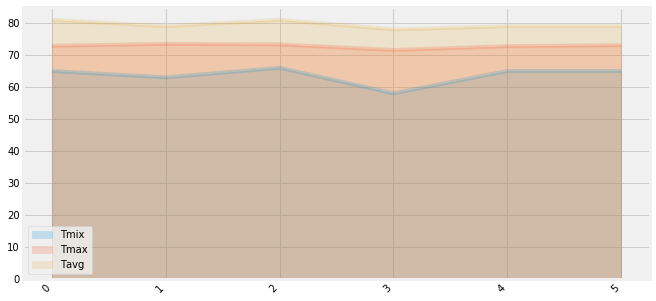

In [36]:
normals_df.plot(kind='area', alpha=0.2,stacked=False, figsize=(10,5))
plt.xticks(rotation=45,ha='right')